# Exploring the two scalar fields model

In this notebook, I try to reproduce some figures from https://arxiv.org/abs/2211.13653

Author: João Victor Rebouças, March 2024

In [58]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

Units: assume $c = \frac{8 \pi G}{3} = H_0 = 1$

In [59]:
# Fixed parameters from Planck 2018
h_cmb = 0.6756 
omegac_planck = 0.12/h_cmb**2
omegab_planck = 0.022/h_cmb**2
omegar = 2.47e-5/h_cmb**2
V0 = 1 - omegac_planck - omegab_planck - omegar

In [60]:
def H_curly(y: list[float], a: float):
	rho_dm, _, phi_prime = y
	rho = omegar * a**(-4) + omegab_planck * a**(-3) + rho_dm + phi_prime**2/(2*a**2) + V0
	return a * np.sqrt(rho)

def equations(y: list[float], a: float):
	rho_dm, phi, phi_prime = y
	H = H_curly(y, a)
	drho_dm = -3*rho_dm/a + phi_prime*rho_dm/(a*H*phi)
	dphi = phi_prime/(a*H)
	dphi_prime = -2*phi_prime/a - a*rho_dm/(phi*H)
	return [drho_dm, dphi, dphi_prime]

In [138]:
phi_i = 8
a_ini = 1e-7
ic = [omegac_planck*a_ini**(-3), phi_i, 0]
a = np.linspace(a_ini, 1, 1000)
result = odeint(equations, ic, a)

In [142]:
phi_i = 15
a_ini = 1e-7
ic = [omegac_planck*a_ini**(-3), phi_i, 0]
a = np.linspace(a_ini, 1, 1000)
result_15 = odeint(equations, ic, a)

In [144]:
rho_dm_a, phi_a, phi_prime_a = result.T
rho_dm_a_15, phi_a_15, phi_prime_a_15 = result_15.T
rho_de_a = phi_prime_a**2/(2*a**2) + V0
rho_de_a_15 = phi_prime_a_15**2/(2*a**2) + V0
rho_r_a = omegar * a**(-4)
rho_b_a = omegab_planck * a**(-3)

In [140]:
# Value of rho_cr from https://pdg.lbl.gov/2015/reviews/rpp2015-rev-astrophysical-constants.pdf
c = 3e5
hc_in_evcm = 1.23e-8
rho_cr_in_gev4 = 1.053e-5 * h_cmb**2 / (8065.544e9)**3

(1e-48, 1e-34)

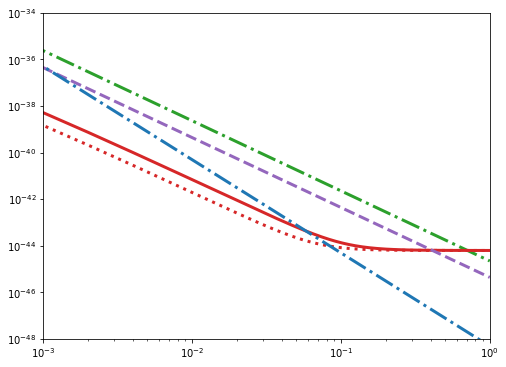

In [146]:
plt.figure(figsize=(8,6))
plt.loglog(a, rho_cr_in_gev4*rho_dm_a, color='tab:green', ls='-.', lw=3)
plt.loglog(a, rho_cr_in_gev4*rho_de_a, color='tab:red', ls='-', lw=3)
plt.loglog(a, rho_cr_in_gev4*rho_de_a_15, color='tab:red', ls=':', lw=3)
plt.loglog(a, rho_cr_in_gev4*rho_b_a, color='tab:purple', ls='--', lw=3)
plt.loglog(a, rho_cr_in_gev4*rho_r_a, color='tab:blue', ls='-.', lw=3)
plt.xlim([1e-3, 1])
plt.ylim([1e-48, 1e-34])